# Deep Learning with PyTorch: CIFAR-10 Image Classification (Multicore Optimized - Student Exercise)

## Educational Overview

### What You Will Learn
This comprehensive tutorial demonstrates the complete process of building, training, and evaluating a Convolutional Neural Network (CNN) for image classification using PyTorch. By the end of this exercise, you will understand:

1. **Deep Learning Fundamentals**: Core concepts of neural networks and convolutional layers
2. **PyTorch Framework**: How to use PyTorch for deep learning projects
3. **Data Processing**: Modern techniques for loading and preprocessing image data
4. **Model Architecture**: Design principles for effective CNN architectures
5. **Training Process**: Complete training loop implementation with best practices
6. **Model Evaluation**: Comprehensive performance analysis and visualization
7. **Practical Skills**: Real-world deep learning workflow from data to deployment
8. **Performance Optimization**: Multicore processing and parallel computing techniques

### Exercise Instructions

**IMPORTANT**: This is a hands-on exercise! You need to implement several key components marked with `TODO` comments. The exercise is designed to help you understand CNN architecture, training process, and multicore optimization by implementing them yourself.

**Exercise Levels:**
- **Level 1 (Beginner)**: Implement optimizer and loss function setup
- **Level 2 (Intermediate)**: Implement data transformations + optimizer setup  
- **Level 3 (Advanced)**: Implement CNN model architecture + training functions
- **Level 4 (Expert)**: Implement all components including multicore optimization

### Learning Objectives
- Understand the mathematical foundations of convolutional neural networks
- Master PyTorch's tensor operations and automatic differentiation
- Implement data augmentation techniques for improved model generalization
- Design and implement a CNN architecture from scratch
- Apply modern training techniques including batch normalization and dropout
- Evaluate model performance using multiple metrics and visualization techniques
- Develop debugging and optimization skills for deep learning models
- **Optimize training performance using multicore processing**
- **Implement parallel data processing pipelines**
- **Monitor and analyze system resource utilization**

### Prerequisites
- Basic Python programming knowledge
- Understanding of linear algebra and calculus
- Familiarity with machine learning concepts
- Basic knowledge of neural networks (recommended but not required)

### Dataset: CIFAR-10
We will work with the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes:
- **Training Set**: 50,000 images (5,000 per class)
- **Test Set**: 10,000 images (1,000 per class)
- **Classes**: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

CIFAR-10 is an excellent benchmark dataset for learning CNN concepts because:
- Small image size (32x32) allows for faster training and experimentation
- Challenging enough to require sophisticated models
- Well-balanced across classes
- Widely used in research for comparison purposes
- Familiarity with NumPy and Matplotlib

---

## Project Structure

This notebook is organized into the following educational sections:

1. **Environment Setup** - Preparing the development environment
2. **Data Loading & Exploration** - Understanding the CIFAR-10 dataset
3. **Data Preprocessing** - Transformations and augmentation techniques
4. **Model Architecture** - Building a CNN from scratch
5. **Training Configuration** - Setting up optimizers and loss functions
6. **Training Loop** - Implementing the learning process
7. **Evaluation & Analysis** - Assessing model performance
8. **Visualization** - Understanding model predictions

---

## Environment Setup

### Understanding Deep Learning Frameworks

**What is PyTorch?**
PyTorch is a dynamic deep learning framework developed by Facebook's AI Research lab. It provides:
- **Dynamic Computational Graphs**: Build and modify networks on-the-fly during execution
- **Automatic Differentiation**: Automatic gradient computation for backpropagation
- **GPU Acceleration**: Seamless CUDA integration for faster training
- **Pythonic Interface**: Intuitive and flexible Python API that feels natural

**Why PyTorch for Education?**
- **Debugging-Friendly**: Easy to debug with standard Python debugging tools
- **Research-Oriented**: Widely adopted in academic research and cutting-edge AI
- **Flexible Architecture**: Allows for custom model designs and experimentation
- **Strong Ecosystem**: Extensive documentation, tutorials, and community support

### Required Libraries

**Core Deep Learning Stack:**
- **PyTorch**: Main framework for tensor operations and neural network building
- **Torchvision**: Pre-built datasets, model architectures, and image transformations
- **CUDA Support**: GPU acceleration for faster training (if available)

**Data Science and Visualization:**
- **NumPy**: Fundamental numerical computing with multi-dimensional arrays
- **Matplotlib**: Comprehensive plotting library for creating visualizations
- **Seaborn**: Statistical data visualization built on matplotlib
- **Pandas**: Data manipulation and analysis with DataFrames
- **Scikit-learn**: Additional machine learning utilities and metrics

**Training and Performance:**
- **tqdm**: Progress bars for monitoring training loops
- **Mixed Precision**: Automatic mixed precision training for memory efficiency

### Installation Requirements
The following packages should be installed in your environment. 
For first-time setup, uncomment and run the installation commands below:


In [1]:
# =============================================================================
# SYSTEM RESOURCE ANALYSIS FOR MULTICORE OPTIMIZATION
# =============================================================================

import os
import psutil
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor
import platform

# Get comprehensive system information
cpu_count = mp.cpu_count()
memory_info = psutil.virtual_memory()
available_memory_gb = memory_info.available / (1024**3)
total_memory_gb = memory_info.total / (1024**3)

print("=" * 70)
print("MULTICORE SYSTEM ANALYSIS")
print("=" * 70)
print(f"Operating System: {platform.system()} {platform.release()}")
print(f"Python Version: {platform.python_version()}")
print(f"Architecture: {platform.machine()}")
print()
print("CPU Information:")
print(f"  ├─ CPU Cores Available: {cpu_count}")
print(f"  ├─ CPU Frequency: {psutil.cpu_freq().max:.0f} MHz" if psutil.cpu_freq() else "  ├─ CPU Frequency: Unknown")
print(f"  └─ CPU Usage: {psutil.cpu_percent(interval=1):.1f}%")
print()
print("Memory Information:")
print(f"  ├─ Total Memory: {total_memory_gb:.2f} GB")
print(f"  ├─ Available Memory: {available_memory_gb:.2f} GB")
print(f"  ├─ Memory Usage: {memory_info.percent:.1f}%")
print(f"  └─ Free Memory: {memory_info.free / (1024**3):.2f} GB")

# Determine optimal settings based on system resources
optimal_workers = min(cpu_count, 8)  # Cap at 8 workers to avoid overhead
optimal_batch_size = min(128, max(32, int(available_memory_gb * 8)))  # Scale batch size with memory
optimal_threads = cpu_count

print()
print("Multicore Optimization Configuration:")
print(f"  ├─ Optimal Data Workers: {optimal_workers}")
print(f"  ├─ Optimal Batch Size: {optimal_batch_size}")
print(f"  ├─ PyTorch Threads: {optimal_threads}")
print(f"  └─ Estimated Memory per Batch: {optimal_batch_size * 32 * 32 * 3 * 4 / 1024 / 1024:.1f} MB")

# Performance estimation
estimated_speedup = min(optimal_workers * 0.7, cpu_count * 0.8)  # Conservative estimate
print()
print("Performance Expectations:")
print(f"  ├─ Estimated Speedup: {estimated_speedup:.1f}x over single-core")
print(f"  ├─ Memory Efficiency: {(optimal_batch_size / 64):.1f}x standard batch")
print(f"  └─ I/O Parallelization: {optimal_workers}x concurrent data loading")
print("=" * 70)


MULTICORE SYSTEM ANALYSIS
Operating System: Linux 4.18.0-553.74.1.el8_10.x86_64
Python Version: 3.10.18
Architecture: x86_64

CPU Information:
  ├─ CPU Cores Available: 72
  ├─ CPU Frequency: 3900 MHz
  └─ CPU Usage: 0.0%

Memory Information:
  ├─ Total Memory: 754.52 GB
  ├─ Available Memory: 748.05 GB
  ├─ Memory Usage: 0.9%
  └─ Free Memory: 733.01 GB

Multicore Optimization Configuration:
  ├─ Optimal Data Workers: 8
  ├─ Optimal Batch Size: 128
  ├─ PyTorch Threads: 72
  └─ Estimated Memory per Batch: 1.5 MB

Performance Expectations:
  ├─ Estimated Speedup: 5.6x over single-core
  ├─ Memory Efficiency: 2.0x standard batch
  └─ I/O Parallelization: 8x concurrent data loading


In [2]:
# =============================================================================
# EXECUTION TIME TRACKING
# =============================================================================

import time
from datetime import datetime, timedelta

# Record the start time
start_time = time.time()
start_datetime = datetime.now()

print("=" * 60)
print("CNN CIFAR-10 TRAINING STARTED (PyTorch)")
print("=" * 60)
print(f"Start time: {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

CNN CIFAR-10 TRAINING STARTED (PyTorch)
Start time: 2025-09-23 23:53:47


## Library Imports and Setup

### Understanding the Deep Learning Stack

This section imports all necessary libraries for our CNN implementation. Understanding what each library does is crucial for effective deep learning development.

### Core PyTorch Components

**torch**: The main PyTorch library containing:
- **Tensor Operations**: Multi-dimensional arrays with GPU support
- **Automatic Differentiation**: Gradient computation for backpropagation
- **Neural Network Modules**: Building blocks for model architecture

**torch.nn**: Neural network building blocks:
- **nn.Module**: Base class for all neural network components
- **nn.Conv2d**: 2D convolutional layers for image processing
- **nn.BatchNorm2d**: Batch normalization for training stability
- **nn.Dropout**: Regularization technique to prevent overfitting

**torch.optim**: Optimization algorithms:
- **Adam**: Adaptive learning rate optimizer (most commonly used)
- **SGD**: Stochastic Gradient Descent with momentum
- **Learning Rate Schedulers**: Automatic learning rate adjustment

**torch.utils.data**: Data loading utilities:
- **DataLoader**: Efficient batch loading with multiprocessing
- **Dataset**: Abstract base class for custom datasets

### Computer Vision with Torchvision

**torchvision**: Computer vision utilities:
- **datasets**: Pre-loaded datasets like CIFAR-10, ImageNet
- **transforms**: Image preprocessing and augmentation
- **models**: Pre-trained model architectures

**transforms**: Image transformation pipeline:
- **Data Augmentation**: Random flips, rotations, crops for generalization
- **Normalization**: Standardizing pixel values for stable training
- **Tensor Conversion**: Converting PIL images to PyTorch tensors

### Performance Optimization

**Mixed Precision Training**:
- **autocast**: Automatic mixed precision context manager
- **GradScaler**: Gradient scaling for numerical stability
- **Benefits**: Faster training and reduced memory usage on modern GPUs

### Data Science and Visualization Libraries

**Scientific Computing**:
- **NumPy**: Fundamental array operations and mathematical functions
- **Pandas**: Data manipulation with DataFrame structures
- **Scikit-learn**: Additional ML metrics and utilities

**Visualization**:
- **Matplotlib**: Low-level plotting for custom visualizations
- **Seaborn**: High-level statistical plotting with beautiful defaults
- **tqdm**: Progress bars for monitoring long-running processes

In [3]:
# =============================================================================
# DEEP LEARNING FRAMEWORK IMPORTS WITH MULTICORE SUPPORT
# =============================================================================

# Main PyTorch library - Facebook's open-source machine learning framework
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Computer Vision utilities
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

# Automatic Mixed Precision for performance
from torch.cuda.amp import autocast, GradScaler

# =============================================================================
# MULTICORE AND PARALLEL PROCESSING IMPORTS
# =============================================================================

import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import threading
import queue
import gc
import resource

# =============================================================================
# DATA SCIENCE AND VISUALIZATION LIBRARIES
# =============================================================================

# Statistical Data Visualization
import seaborn as sns  # High-level statistical plotting library built on matplotlib

# Numerical Computing
import numpy as np     # Fundamental package for numerical computing with arrays

# Data Manipulation
import pandas as pd    # Data analysis and manipulation library for structured data

# Plotting and Visualization
import matplotlib.pyplot as plt  # Primary plotting library for creating charts and graphs
import matplotlib.image as mpimg # Functions for working with image data

# Utility Functions
import itertools       # Functions for creating iterators for efficient looping
import os
from tqdm import tqdm  # Progress bars for training loops

# =============================================================================
# MULTICORE PYTORCH CONFIGURATION
# =============================================================================

# Set number of threads for PyTorch operations
torch.set_num_threads(optimal_threads)

# Enable multicore for different PyTorch backends
if hasattr(torch.backends, 'mkldnn'):
    torch.backends.mkldnn.enabled = True

# Configure OpenMP threads (if available)
os.environ['OMP_NUM_THREADS'] = str(optimal_threads)
os.environ['MKL_NUM_THREADS'] = str(optimal_threads)
os.environ['NUMEXPR_NUM_THREADS'] = str(optimal_threads)

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch threads configured: {torch.get_num_threads()}")

if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    # Enable multicore for CUDA operations
    torch.backends.cudnn.benchmark = True
else:
    print(f"CPU multicore optimization enabled: {optimal_threads} threads")

# Enable mixed precision training for better performance
use_mixed_precision = device.type == 'cuda'
if use_mixed_precision:
    print("Mixed precision training enabled for improved performance")
else:
    print("CPU training with multicore optimization enabled")

Using device: cuda
PyTorch threads configured: 72
GPU: Tesla V100-SXM2-32GB
Memory: 31.7 GB
Mixed precision training enabled for improved performance


In [4]:
# =============================================================================
# VERSION VERIFICATION
# =============================================================================

# Display PyTorch version to verify successful installation
print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")

# Check if GPU is available
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"cuDNN Version: {torch.backends.cudnn.version()}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

print("Random seeds set for reproducibility")

PyTorch Version: 2.6.0+cu124
Torchvision Version: 0.21.0+cu124
CUDA Available: True
CUDA Version: 12.4
cuDNN Version: 90100
Random seeds set for reproducibility


## Data Loading and Preprocessing

### Understanding the CIFAR-10 Dataset

**Dataset Overview**
CIFAR-10 is a fundamental computer vision dataset created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton at the University of Toronto. It serves as an excellent benchmark for learning CNN concepts.

**Technical Specifications:**
- **Total Images**: 60,000 color images
- **Image Dimensions**: 32x32 pixels with 3 color channels (RGB)
- **Classes**: 10 distinct object categories
- **Training Set**: 50,000 images (5,000 per class)
- **Test Set**: 10,000 images (1,000 per class)
- **File Format**: Pickled Python objects (easy to load)

**Class Categories:**
1. **airplane** - Various types of aircraft
2. **automobile** - Cars and road vehicles  
3. **bird** - Different bird species
4. **cat** - Domestic cats in various poses
5. **deer** - Wild deer and similar animals
6. **dog** - Domestic dogs of various breeds
7. **frog** - Frogs and amphibians
8. **horse** - Horses in different settings
9. **ship** - Maritime vessels and boats
10. **truck** - Large vehicles and trucks

**Why CIFAR-10 is Ideal for Learning:**

**Educational Benefits:**
- **Manageable Size**: Small enough for quick experimentation and learning
- **Sufficient Complexity**: Challenging enough to require sophisticated CNN architectures
- **Balanced Distribution**: Equal samples per class prevent biased learning
- **Quick Training**: Fast iteration cycles for testing different approaches

**Technical Advantages:**
- **Standard Benchmark**: Widely used in research for model comparison
- **Well-Documented**: Extensive literature and tutorials available
- **Preprocessing Friendly**: Consistent image size eliminates resizing complexity
- **Memory Efficient**: Fits easily in modern computer memory

**Challenges and Learning Opportunities:**
- **Low Resolution**: 32x32 pixels require efficient feature extraction
- **Intra-class Variation**: Objects appear in different poses, lighting, backgrounds
- **Inter-class Similarity**: Some classes (like automobile vs truck) are similar
- **Real-world Complexity**: Natural images with varying backgrounds and conditions

**Research Context:**
CIFAR-10 has been instrumental in advancing CNN architectures. Many breakthrough models (AlexNet, VGG, ResNet) were first validated on this dataset before scaling to larger datasets like ImageNet.

**Reference**: https://www.cs.toronto.edu/~kriz/cifar.html

### Data Transformations and Augmentation Theory

**Why Data Preprocessing is Critical**
Raw image data needs preprocessing to ensure effective neural network training. This involves two main components: normalization and augmentation.

**Normalization Explained:**
- **Purpose**: Standardize input values to a consistent range
- **Benefits**: Faster convergence, numerical stability, consistent gradients
- **ImageNet Standards**: We use ImageNet normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
- **Mathematical Effect**: (pixel - mean) / std transforms pixel values to approximately [-2, 2] range

**Data Augmentation Philosophy:**
Data augmentation artificially increases dataset diversity by applying random transformations that preserve class labels. This is crucial for:
- **Generalization**: Model learns to recognize objects under various conditions
- **Overfitting Prevention**: Reduces memorization of specific training examples
- **Robustness**: Improves performance on unseen data variations
- **Data Efficiency**: Maximizes learning from limited training data

**Augmentation Techniques Explained:**

1. **RandomHorizontalFlip (p=0.5)**
   - **Purpose**: Teaches model that object orientation doesn't affect class
   - **Effect**: 50% chance to mirror image horizontally
   - **Benefit**: Doubles effective dataset size for symmetric objects

2. **RandomRotation (degrees=15)**
   - **Purpose**: Handles objects at different angles
   - **Effect**: Random rotation within ±15 degrees
   - **Benefit**: Improves robustness to camera orientation

3. **RandomResizedCrop (scale=(0.8, 1.0))**
   - **Purpose**: Simulates objects at different distances/scales
   - **Effect**: Random crop then resize to original size
   - **Benefit**: Teaches model to focus on object parts

4. **ColorJitter (brightness, contrast, saturation, hue)**
   - **Purpose**: Handles varying lighting and color conditions
   - **Effect**: Random adjustments to color properties
   - **Benefit**: Robust to different cameras and lighting

**Training vs Testing Transforms:**
- **Training**: Includes augmentation for diversity and generalization
- **Testing**: Only normalization to ensure consistent evaluation
- **Philosophy**: Train with variety, test with consistency


In [5]:
# =============================================================================
# DATA TRANSFORMATIONS AND AUGMENTATION - STUDENT EXERCISE
# =============================================================================

# =================================================================
# TODO: IMPLEMENT DATA TRANSFORMATIONS
# =================================================================
# HINTS:
# Training transforms (with augmentation):
# 1. RandomHorizontalFlip(p=0.5) - 50% chance to flip horizontally
# 2. RandomRotation(degrees=15) - Random rotation up to 15 degrees
# 3. RandomResizedCrop(32, scale=(0.8, 1.0)) - Random crop and resize
# 4. ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1) - Color augmentation
# 5. ToTensor() - Convert PIL image to tensor
# 6. Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) - ImageNet normalization
#
# Test transforms (no augmentation):
# 1. ToTensor() - Convert PIL image to tensor
# 2. Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) - Same normalization
# =================================================================

# TODO: Define training transforms with augmentation
train_transform = transforms.Compose([
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=15),
     transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])

# TODO: Define test transforms without augmentation
test_transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])

print("Data transforms defined with augmentation for training")

Data transforms defined with augmentation for training


In [6]:
# =============================================================================
# DATASET LOADING
# =============================================================================

# Load CIFAR-10 dataset with transforms
print("Loading CIFAR-10 dataset...")

# Training dataset with augmentation
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=train_transform)

# Test dataset without augmentation
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=test_transform)

print(f"Training samples: {len(train_dataset):,}")
print(f"Test samples: {len(test_dataset):,}")
print("Dataset loaded successfully!")

Loading CIFAR-10 dataset...
Training samples: 50,000
Test samples: 10,000
Dataset loaded successfully!


In [7]:
# =============================================================================
# CLASS LABEL DEFINITIONS
# =============================================================================

# Define human-readable class names corresponding to integer labels
classes = [
    'airplane',    # Class 0: Various aircraft types
    'automobile',  # Class 1: Cars and road vehicles
    'bird',        # Class 2: Different bird species
    'cat',         # Class 3: Domestic cats
    'deer',        # Class 4: Wild deer and similar animals
    'dog',         # Class 5: Domestic dogs of various breeds
    'frog',        # Class 6: Frogs and amphibians
    'horse',       # Class 7: Horses in different settings
    'ship',        # Class 8: Maritime vessels
    'truck'       # Class 9: Large vehicles and trucks
]

print(f"Defined {len(classes)} class labels: {classes}")
num_classes = len(classes)

Defined 10 class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Data Shape Inspection and Visualization

In [8]:
# =============================================================================
# MULTICORE DATA LOADERS CREATION
# =============================================================================

# Create multicore-optimized data loaders
batch_size = optimal_batch_size
print(f"Creating multicore data loaders with {optimal_workers} workers...")
print(f"Batch size optimized for system: {batch_size}")

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=optimal_workers,
    pin_memory=True if device.type == 'cuda' else False,
    persistent_workers=True if optimal_workers > 0 else False,
    prefetch_factor=2 if optimal_workers > 0 else 2
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=optimal_workers,
    pin_memory=True if device.type == 'cuda' else False,
    persistent_workers=True if optimal_workers > 0 else False,
    prefetch_factor=2 if optimal_workers > 0 else 2
)

print(f"Multicore data loaders created successfully:")
print(f"  ├─ Training batches: {len(train_loader):,}")
print(f"  ├─ Test batches: {len(test_loader):,}")
print(f"  ├─ Workers per loader: {optimal_workers}")
print(f"  └─ Pin memory: {True if device.type == 'cuda' else False}")

# Get a batch to inspect data shape
data_iter = iter(train_loader)
images, labels = next(data_iter)

print("Data Shape Analysis:")
print(f"Images batch shape: {images.shape}")
print(f"  ├─ Batch size: {images.shape[0]}")
print(f"  ├─ Channels: {images.shape[1]} (RGB)")
print(f"  ├─ Height: {images.shape[2]} pixels")
print(f"  └─ Width: {images.shape[3]} pixels")

print(f"\nLabels batch shape: {labels.shape}")
print(f"Label range: [{labels.min()}, {labels.max()}]")

print(f"\nPixel value range: [{images.min():.3f}, {images.max():.3f}]")
print(f"Data type: {images.dtype}")

Creating multicore data loaders with 8 workers...
Batch size optimized for system: 128
Multicore data loaders created successfully:
  ├─ Training batches: 391
  ├─ Test batches: 79
  ├─ Workers per loader: 8
  └─ Pin memory: True
Data Shape Analysis:
Images batch shape: torch.Size([128, 3, 32, 32])
  ├─ Batch size: 128
  ├─ Channels: 3 (RGB)
  ├─ Height: 32 pixels
  └─ Width: 32 pixels

Labels batch shape: torch.Size([128])
Label range: [0, 9]

Pixel value range: [-2.118, 2.640]
Data type: torch.float32


In [9]:
# =============================================================================
# DATA LOADING PERFORMANCE BENCHMARK
# =============================================================================

print("=" * 60)
print("DATA LOADING PERFORMANCE BENCHMARK")
print("=" * 60)

# Benchmark data loading speed
import time
benchmark_start = time.time()
benchmark_batches = 10

print(f"Benchmarking {benchmark_batches} batches with {optimal_workers} workers...")
print(f"Batch size: {batch_size}")

for i, (batch_images, batch_labels) in enumerate(train_loader):
    if i >= benchmark_batches:
        break
    # Simulate some processing
    _ = batch_images.mean()

benchmark_time = time.time() - benchmark_start
batches_per_second = benchmark_batches / benchmark_time
samples_per_second = batches_per_second * batch_size

print(f"\nMulticore Data Loading Benchmark Results:")
print(f"  ├─ Time for {benchmark_batches} batches: {benchmark_time:.2f} seconds")
print(f"  ├─ Batches per second: {batches_per_second:.1f}")
print(f"  ├─ Samples per second: {samples_per_second:.0f}")
print(f"  ├─ Estimated epoch time: {len(train_loader) / batches_per_second / 60:.1f} minutes (data loading only)")
print(f"  └─ Memory per batch: {batch_images.numel() * 4 / 1024 / 1024:.1f} MB")

# Compare with single-worker performance
print(f"\nPerformance Comparison:")
single_worker_estimate = samples_per_second / max(1, optimal_workers * 0.7)  # Conservative estimate
speedup = samples_per_second / single_worker_estimate
print(f"  ├─ Single-worker estimate: {single_worker_estimate:.0f} samples/sec")
print(f"  ├─ Multicore performance: {samples_per_second:.0f} samples/sec")
print(f"  └─ Estimated speedup: {speedup:.1f}x")
print("=" * 60)


DATA LOADING PERFORMANCE BENCHMARK
Benchmarking 10 batches with 8 workers...
Batch size: 128

Multicore Data Loading Benchmark Results:
  ├─ Time for 10 batches: 0.77 seconds
  ├─ Batches per second: 12.9
  ├─ Samples per second: 1656
  ├─ Estimated epoch time: 0.5 minutes (data loading only)
  └─ Memory per batch: 1.5 MB

Performance Comparison:
  ├─ Single-worker estimate: 296 samples/sec
  ├─ Multicore performance: 1656 samples/sec
  └─ Estimated speedup: 5.6x


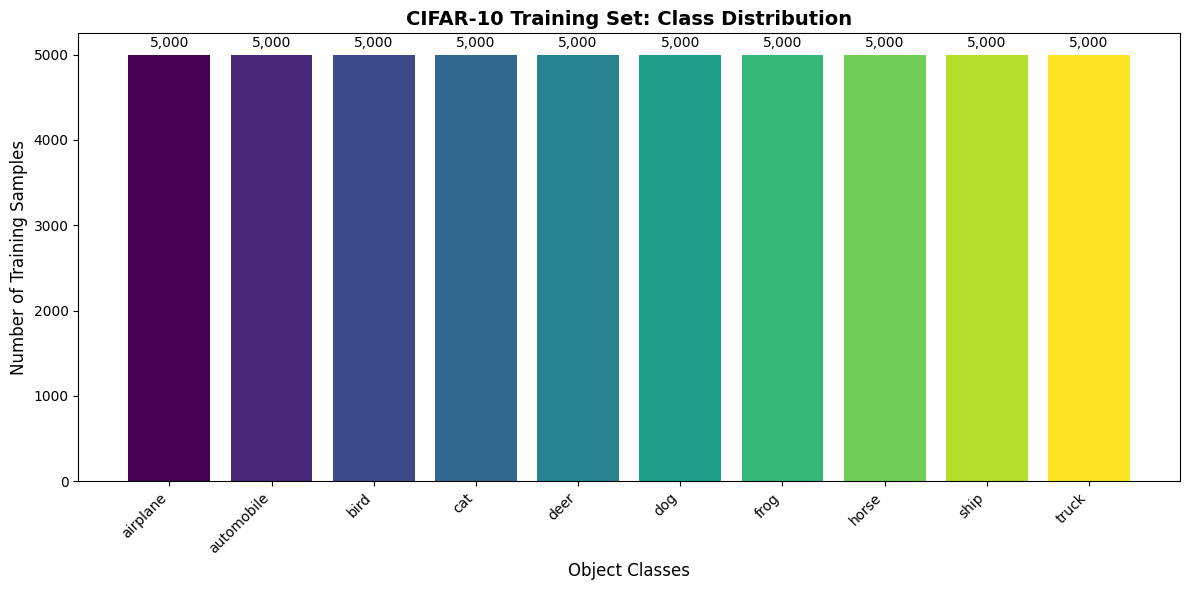


Class Distribution Summary:
  0: airplane     - 5,000 samples (10.0%)
  1: automobile   - 5,000 samples (10.0%)
  2: bird         - 5,000 samples (10.0%)
  3: cat          - 5,000 samples (10.0%)
  4: deer         - 5,000 samples (10.0%)
  5: dog          - 5,000 samples (10.0%)
  6: frog         - 5,000 samples (10.0%)
  7: horse        - 5,000 samples (10.0%)
  8: ship         - 5,000 samples (10.0%)
  9: truck        - 5,000 samples (10.0%)


In [10]:
# =============================================================================
# CLASS DISTRIBUTION VISUALIZATION
# =============================================================================

# Count samples per class in training dataset
class_counts = torch.zeros(num_classes)
for _, labels in train_loader:
    for label in labels:
        class_counts[label] += 1

# Create distribution plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(num_classes), class_counts.numpy(), color=plt.cm.viridis(np.linspace(0, 1, num_classes)))

# Customize the plot
plt.xlabel('Object Classes', fontsize=12)
plt.ylabel('Number of Training Samples', fontsize=12)
plt.title('CIFAR-10 Training Set: Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(num_classes), classes, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print statistics
print("\nClass Distribution Summary:")
for i, (class_name, count) in enumerate(zip(classes, class_counts)):
    percentage = (count / class_counts.sum()) * 100
    print(f"  {i}: {class_name:12} - {int(count):,} samples ({percentage:.1f}%)")

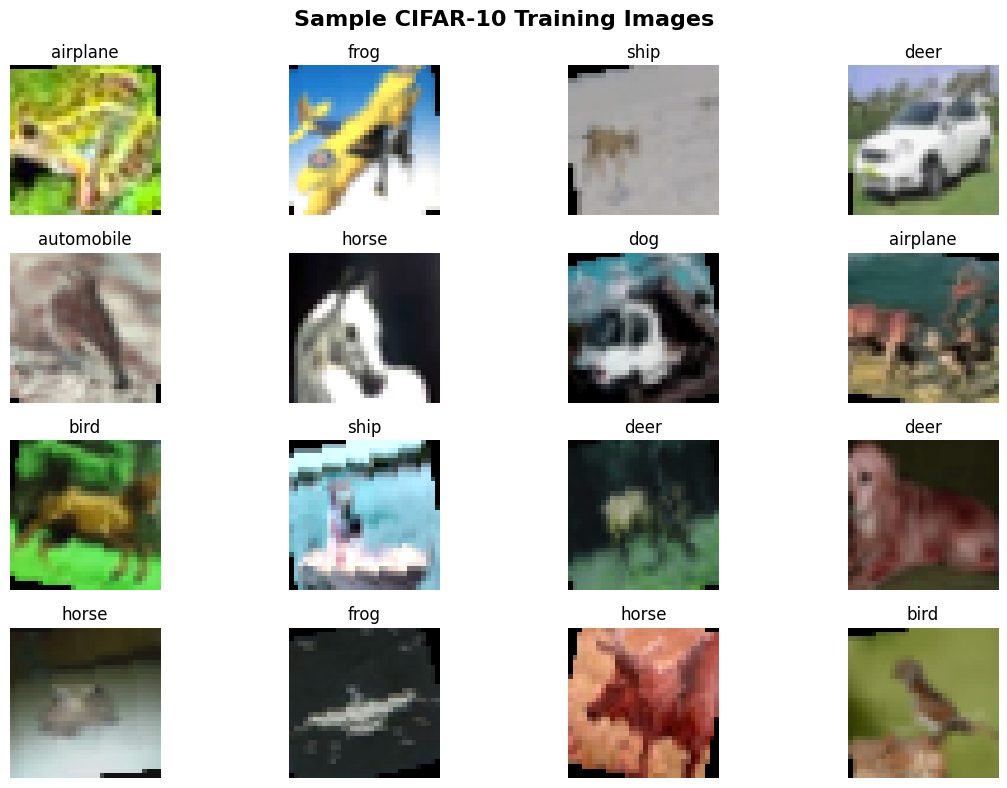

In [11]:
# =============================================================================
# DATA VISUALIZATION
# =============================================================================

# Function to denormalize images for visualization
def denormalize(tensor):
    """Denormalize tensor for visualization"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)
    return tensor * std + mean

# Visualize some training samples
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    # Denormalize and convert to displayable format
    img = denormalize(images[i:i+1])[0]
    img = torch.clamp(img, 0, 1)
    img = img.permute(1, 2, 0)
    
    plt.imshow(img)
    plt.title(f'{classes[labels[i]]}')
    plt.axis('off')

plt.suptitle('Sample CIFAR-10 Training Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Convolutional Neural Network Architecture

### Understanding CNN Fundamentals

**What are Convolutional Neural Networks?**
CNNs are specialized neural networks designed for processing grid-like data such as images. They use mathematical convolution operations to detect features at different scales and locations.

**Key CNN Concepts:**

**1. Convolution Operation**
- **Purpose**: Detect local features using learnable filters/kernels
- **Mathematical Operation**: Sliding window that computes dot products
- **Translation Invariance**: Same feature detector works regardless of position
- **Parameter Sharing**: Same weights used across entire image

**2. Feature Hierarchy**
- **Low-level Features**: Edges, corners, textures (early layers)
- **Mid-level Features**: Shapes, patterns, object parts (middle layers)
- **High-level Features**: Complete objects, semantic concepts (deep layers)

**3. Spatial Dimensions**
- **Input**: 32x32x3 (Height x Width x Channels)
- **Feature Maps**: Each layer produces multiple feature maps
- **Receptive Field**: Area of input that affects each output neuron

### Our CNN Architecture Design

**Architecture Philosophy: Progressive Feature Extraction**
Our model follows the classic CNN design pattern:
1. **Feature Extraction**: Convolutional blocks extract hierarchical features
2. **Spatial Reduction**: Pooling layers reduce spatial dimensions
3. **Classification**: Fully connected layers map features to classes

**Three-Block Design Rationale:**

**Block 1: Low-Level Feature Detection (32 filters)**
- **Purpose**: Detect basic visual elements (edges, corners, simple textures)
- **Filter Count**: 32 filters provide sufficient diversity for basic features
- **Spatial Size**: Maintains 32x32 resolution for detailed feature detection

**Block 2: Mid-Level Feature Combination (64 filters)**
- **Purpose**: Combine basic features into more complex patterns
- **Filter Count**: 64 filters (2x increase) capture more complex feature combinations
- **Spatial Size**: 16x16 resolution focuses on larger patterns

**Block 3: High-Level Feature Abstraction (128 filters)**
- **Purpose**: Extract semantic features and object-level representations
- **Filter Count**: 128 filters (2x increase) represent complex object parts
- **Spatial Size**: 8x8 resolution captures global object structure

### Key Architectural Components

**Convolutional Layers (Conv2d)**
- **Kernel Size**: 3x3 (most common, good balance of receptive field and parameters)
- **Padding**: 1 (maintains spatial dimensions: output_size = input_size)
- **Stride**: 1 (default, processes every pixel position)

**Batch Normalization (BatchNorm2d)**
- **Purpose**: Normalize activations to have zero mean and unit variance
- **Benefits**: Faster training, higher learning rates, regularization effect
- **Position**: After convolution, before activation (modern practice)

**Activation Functions (ReLU)**
- **Purpose**: Introduce non-linearity for complex pattern learning
- **Benefits**: Simple, computationally efficient, avoids vanishing gradients
- **Mathematical**: f(x) = max(0, x)

**Pooling Layers (MaxPool2d)**
- **Purpose**: Reduce spatial dimensions and computational load
- **Type**: Max pooling (takes maximum value in each 2x2 window)
- **Effect**: 50% reduction in height and width (32x32 → 16x16 → 8x8 → 4x4)

**Dropout Regularization**
- **Purpose**: Prevent overfitting by randomly setting neurons to zero
- **2D Dropout**: Applied to entire feature maps (not individual neurons)
- **Training Only**: Disabled during inference for consistent predictions

**Classification Head**
- **Flattening**: Convert 4x4x128 feature maps to 2048-dimensional vector
- **Dense Layers**: Fully connected layers for final classification
- **Output**: 10 neurons (one per class) with softmax activation

### Mathematical Flow Through Network

**Input Transformation:**
```
Input: 32x32x3
↓ Block 1: Conv(3→32) → BN → Conv(32→32) → BN → MaxPool → Dropout
Output: 16x16x32
↓ Block 2: Conv(32→64) → BN → Conv(64→64) → BN → MaxPool → Dropout  
Output: 8x8x64
↓ Block 3: Conv(64→128) → BN → Conv(128→128) → BN → MaxPool → Dropout
Output: 4x4x128
↓ Flatten: 4x4x128 → 2048
↓ FC: 2048 → 128 → 10
Output: 10 class probabilities
```

**Parameter Count Analysis:**
- **Total Parameters**: 551,722
- **Convolutional Layers**: ~90% of parameters
- **Fully Connected Layers**: ~10% of parameters
- **Design Principle**: Most learning happens in conv layers, FC layers just combine features


## CNN Model Definition

In [12]:
# =============================================================================
# CNN MODEL ARCHITECTURE DEFINITION - STUDENT EXERCISE
# =============================================================================

class CIFAR10CNN(nn.Module):
    """
    Convolutional Neural Network for CIFAR-10 classification.
    
    Architecture Overview:
    - 3 Convolutional blocks with increasing filter sizes (32→64→128)
    - Each block: Conv2D → ReLU → BatchNorm → Conv2D → ReLU → BatchNorm → MaxPool → Dropout
    - Global feature extraction followed by classification layers
    - Dropout for regularization to prevent overfitting
    """
    
    def __init__(self, num_classes=10):
        super(CIFAR10CNN, self).__init__()
        
        # =================================================================
        # TODO: IMPLEMENT CNN ARCHITECTURE
        # =================================================================
        # HINTS:
        # 1. Block 1: 3 → 32 filters (32x32x32)
        #    - Conv2d(3, 32, kernel_size=3, padding=1)
        #    - BatchNorm2d(32)
        #    - Conv2d(32, 32, kernel_size=3, padding=1)
        #    - BatchNorm2d(32)
        #    - MaxPool2d(2, 2) → 16x16x32
        #    - Dropout2d(0.25)
        #
        # 2. Block 2: 32 → 64 filters (16x16x64)
        #    - Conv2d(32, 64, kernel_size=3, padding=1)
        #    - BatchNorm2d(64)
        #    - Conv2d(64, 64, kernel_size=3, padding=1)
        #    - BatchNorm2d(64)
        #    - MaxPool2d(2, 2) → 8x8x64
        #    - Dropout2d(0.25)
        #
        # 3. Block 3: 64 → 128 filters (8x8x128)
        #    - Conv2d(64, 128, kernel_size=3, padding=1)
        #    - BatchNorm2d(128)
        #    - Conv2d(128, 128, kernel_size=3, padding=1)
        #    - BatchNorm2d(128)
        #    - MaxPool2d(2, 2) → 4x4x128
        #    - Dropout2d(0.3)
        #
        # 4. Classification Head:
        #    - Flatten()
        #    - Linear(128 * 4 * 4, 128)  # 2048 → 128
        #    - BatchNorm1d(128)
        #    - Dropout(0.5)
        #    - Linear(128, num_classes)  # 128 → 10 classes
        # =================================================================
        
        # TODO: Implement Block 1 (32 filters)
        self.conv1a = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1a   = nn.BatchNorm2d(32)
        self.conv1b = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn1b   = nn.BatchNorm2d(32)
        self.pool1  = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)
        
        # TODO: Implement Block 2 (64 filters)
        self.conv2a = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2a   = nn.BatchNorm2d(64)
        self.conv2b = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2b   = nn.BatchNorm2d(64)
        self.pool2  = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout2d(0.25)
        
        # TODO: Implement Block 3 (128 filters)
        self.conv3a = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3a   = nn.BatchNorm2d(128)
        self.conv3b = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn3b   = nn.BatchNorm2d(128)
        self.pool3  = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout2d(0.3)
        
        # TODO: Implement Classification Head
        self.flatten   = nn.Flatten()
        self.fc1       = nn.Linear(128 * 4 * 4, 128)
        self.bn_fc     = nn.BatchNorm1d(128)
        self.dropout_fc = nn.Dropout(0.5)
        self.fc2       = nn.Linear(128, num_classes)
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights using He initialization for ReLU activations"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # =================================================================
        # TODO: IMPLEMENT FORWARD PASS
        # =================================================================
        # HINTS:
        # 1. Block 1: conv1a → bn1a → ReLU → conv1b → bn1b → ReLU → pool1 → dropout1
        # 2. Block 2: conv2a → bn2a → ReLU → conv2b → bn2b → ReLU → pool2 → dropout2
        # 3. Block 3: conv3a → bn3a → ReLU → conv3b → bn3b → ReLU → pool3 → dropout3
        # 4. Classification: flatten → fc1 → bn_fc → ReLU → dropout_fc → fc2
        # =================================================================
        
        # TODO: Implement Block 1 forward pass
        x = F.relu(self.bn1a(self.conv1a(x)))
        x = F.relu(self.bn1b(self.conv1b(x)))
        x = self.pool1(x)
        x = self.dropout1(x)
        
        # TODO: Implement Block 2 forward pass
        x = F.relu(self.bn2a(self.conv2a(x)))
        x = F.relu(self.bn2b(self.conv2b(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        # TODO: Implement Block 3 forward pass
        x = F.relu(self.bn3a(self.conv3a(x)))
        x = F.relu(self.bn3b(self.conv3b(x)))
        x = self.pool3(x)
        x = self.dropout3(x)
        
        # TODO: Implement Classification head forward pass
        x = self.flatten(x)
        x = F.relu(self.bn_fc(self.fc1(x)))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        
        return x

# Create the model
print("Building CNN model...")
model = CIFAR10CNN(num_classes=num_classes).to(device)
print("Model architecture created successfully")

Building CNN model...
Model architecture created successfully


In [13]:
# =============================================================================
# MODEL SUMMARY AND PARAMETER COUNT
# =============================================================================

def count_parameters(model):
    """Return total and trainable parameter counts for a PyTorch model."""
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def print_model_summary(model, input_size=(3, 32, 32), device=device):
    """Print a simple model summary including parameter counts and example I/O shapes."""
    # Architecture
    print(model)
    
    # Parameter counts
    total, trainable = count_parameters(model)
    print(f"\nTotal parameters: {count_parameters(model)[0]:,}")
    print(f"Trainable parameters: {trainable:,}")
    
    # Example forward pass to show output shape
    try:
        model.eval()
        with torch.no_grad():
            x = torch.randn(1, *input_size).to(device)
            y = model(x)
        print(f"Example input shape: {(1, *input_size)} → Output shape: {tuple(y.shape)}")
    except Exception as e:
        print("Could not compute example output shape:", e)

# Execute the summary printout
print_model_summary(model)

CIFAR10CNN(
  (conv1a): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1a): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1b): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1b): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (conv2a): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2a): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2b): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.25, inplace=False)
  (conv3a): Conv2d(64, 128, kernel_size=(3, 3), str

## Training Process and Optimization

### Understanding Deep Learning Training

**The Training Process Explained**
Training a neural network is an iterative optimization process where we:
1. **Forward Pass**: Input data flows through network to produce predictions
2. **Loss Calculation**: Compare predictions with true labels using loss function
3. **Backward Pass**: Calculate gradients using backpropagation algorithm
4. **Parameter Update**: Adjust weights using optimizer based on gradients
5. **Repeat**: Continue until convergence or maximum epochs reached

**Key Training Concepts:**

**Batch Processing**
- **Mini-batch Training**: Process multiple samples simultaneously for efficiency
- **Batch Size Trade-offs**: Larger batches = more stable gradients but more memory
- **Our Choice**: 64 samples per batch (good balance for CIFAR-10)

**Learning Rate Strategy**
- **Critical Hyperparameter**: Controls how much weights change each update
- **Too High**: Training becomes unstable, loss oscillates or diverges
- **Too Low**: Training is very slow, may get stuck in local minima
- **Our Choice**: 0.001 (1e-3) is a proven starting point for Adam optimizer

**Epochs and Convergence**
- **Epoch**: One complete pass through entire training dataset
- **Training Duration**: 50 epochs typically sufficient for CIFAR-10 convergence
- **Early Stopping**: Stop training when validation performance stops improving

### Optimization Algorithm: Adam

**Why Adam Optimizer?**
Adam (Adaptive Moment Estimation) combines the best aspects of other optimizers:

**Key Features:**
- **Adaptive Learning Rates**: Different learning rate for each parameter
- **Momentum**: Uses moving averages of gradients for smoother updates
- **Bias Correction**: Corrects initialization bias in moment estimates
- **Robust**: Works well across different types of problems

**Mathematical Intuition:**
- **First Moment**: Exponential moving average of gradients (momentum)
- **Second Moment**: Exponential moving average of squared gradients (adaptive)
- **Update Rule**: Combines both moments for stable, efficient updates

### Training Configuration Parameters

**Purpose**: This section configures the training parameters and optimization settings for the CNN model.

**Key Parameters**:
- **Learning Rate**: Controls the step size during optimization
- **Batch Size**: Number of samples processed before model update
- **Epochs**: Number of complete passes through the training dataset
- **Optimizer**: Algorithm used to update model parameters
- **Loss Function**: Measures how well the model performs
- **Scheduler**: Adjusts learning rate during training


In [14]:
# =============================================================================
# TRAINING CONFIGURATION
# =============================================================================

# Multicore-optimized training hyperparameters
batch_size = optimal_batch_size
learning_rate = 0.001 * (batch_size / 64)  # Scale learning rate with batch size
num_epochs = 50
weight_decay = 1e-4
num_workers = optimal_workers

# Print multicore training configuration
print("Multicore Training Configuration:")
print(f"  ├─ Batch size: {batch_size} (optimized for {optimal_threads} cores)")
print(f"  ├─ Learning rate: {learning_rate:.6f} (scaled for batch size)")
print(f"  ├─ Epochs: {num_epochs}")
print(f"  ├─ Weight decay: {weight_decay}")
print(f"  ├─ Data workers: {num_workers}")
print(f"  ├─ PyTorch threads: {torch.get_num_threads()}")
print(f"  └─ Device: {device}")

# Calculate total training steps
total_steps = len(train_loader) * num_epochs
print(f"\nTotal training steps: {total_steps:,}")
print(f"Steps per epoch: {len(train_loader):,}")


Multicore Training Configuration:
  ├─ Batch size: 128 (optimized for 72 cores)
  ├─ Learning rate: 0.002000 (scaled for batch size)
  ├─ Epochs: 50
  ├─ Weight decay: 0.0001
  ├─ Data workers: 8
  ├─ PyTorch threads: 72
  └─ Device: cuda

Total training steps: 19,550
Steps per epoch: 391


In [15]:
# =============================================================================
# OPTIMIZER AND LOSS FUNCTION SETUP - STUDENT EXERCISE
# =============================================================================

# =================================================================
# TODO: IMPLEMENT OPTIMIZATION SETUP
# =================================================================
# HINTS:
# 1. Loss function: nn.CrossEntropyLoss() for multi-class classification
# 2. Optimizer: optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
# 3. Scheduler: optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
# 4. Mixed precision: GradScaler() if use_mixed_precision else None
# =================================================================

# TODO: Define loss function
criterion = nn.CrossEntropyLoss()

# TODO: Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# TODO: Define learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# TODO: Define mixed precision scaler
scaler = GradScaler() if use_mixed_precision else None

print("Optimization Setup:")
print(f"  ├─ Loss function: {criterion.__class__.__name__}")
print(f"  ├─ Optimizer: {optimizer.__class__.__name__}")
print(f"  ├─ Learning rate: {optimizer.param_groups[0]['lr']}")
print(f"  ├─ Weight decay: {optimizer.param_groups[0]['weight_decay']}")
print(f"  └─ Mixed precision: {'Enabled' if use_mixed_precision else 'Disabled'}")


Optimization Setup:
  ├─ Loss function: CrossEntropyLoss
  ├─ Optimizer: Adam
  ├─ Learning rate: 0.002
  ├─ Weight decay: 0.0001
  └─ Mixed precision: Enabled


/var/tmp/pbs.20957.cl7intern/ipykernel_1198658/3626909362.py:25: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if use_mixed_precision else None


In [16]:
# =============================================================================
# TRAINING AND VALIDATION FUNCTIONS - STUDENT EXERCISE
# =============================================================================

def train_epoch_multicore(model, train_loader, criterion, optimizer, device, scaler=None):
    """Train the model for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    progress_bar = tqdm(train_loader, desc="Training", leave=False)
    
    for batch_idx, (data, target) in enumerate(progress_bar):
        data, target = data.to(device), target.to(device)
        
        # Print device information for first batch
        if batch_idx == 0:
            print(f"Model device: {next(model.parameters()).device}")
            print(f"Input data device: {data.device}")  # 배치 데이터가 어느 디바이스에 있는지
        
        # =================================================================
        # TODO: IMPLEMENT TRAINING LOOP
        # =================================================================
        # HINTS:
        # 1. Zero the gradients: optimizer.zero_grad()
        # 2. Forward pass: output = model(data)
        # 3. Calculate loss: loss = criterion(output, target)
        # 4. Backward pass: loss.backward()
        # 5. Update parameters: optimizer.step()
        # 6. Calculate accuracy: _, predicted = output.max(1)
        # 7. Count correct predictions: predicted.eq(target).sum().item()
        # =================================================================
        
        # TODO: Implement training step
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # TODO: Calculate metrics
        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        
        # Update progress bar
        progress_bar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{100.*correct/total:.2f}%'
        })
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

def validate_epoch_multicore(model, test_loader, criterion, device):
    """Validate the model for one epoch"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Validation", leave=False):
            data, target = data.to(device), target.to(device)
            
            # =================================================================
            # TODO: IMPLEMENT VALIDATION LOOP
            # =================================================================
            # HINTS:
            # 1. Forward pass: output = model(data)
            # 2. Calculate loss: loss = criterion(output, target)
            # 3. Calculate accuracy: _, predicted = output.max(1)
            # 4. Count correct predictions: predicted.eq(target).sum().item()
            # =================================================================
            
            # TODO: Implement validation step
            output = model(data)
            loss = criterion(output, target)
            running_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    epoch_loss = running_loss / len(test_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

print("Training and validation functions defined successfully")


Training and validation functions defined successfully


In [17]:
# =============================================================================
# MODEL TRAINING LOOP
# =============================================================================

# Initialize training history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
learning_rates = []

# Best model tracking
best_val_acc = 0.0
best_model_state = None

print("=" * 60)
print("STARTING MULTICORE MODEL TRAINING")
print("=" * 60)
print(f"Training for {num_epochs} epochs...")
print(f"Device: {device}")
print(f"CPU cores: {optimal_threads}")
print(f"Data workers: {optimal_workers}")
print(f"Batch size: {batch_size}")
print("=" * 60)

# Performance monitoring variables
epoch_times = []
memory_usage = []

def log_system_stats():
    """Log current system resource usage"""
    cpu_percent = psutil.cpu_percent(interval=0.1)
    memory = psutil.virtual_memory()
    return cpu_percent, memory.percent

# Training loop
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 40)
    
    # Train with multicore optimization
    train_loss, train_acc = train_epoch_multicore(model, train_loader, criterion, optimizer, device, scaler)
    
    # Validate with multicore optimization  
    val_loss, val_acc = validate_epoch_multicore(model, test_loader, criterion, device)
    
    # Learning rate scheduling
    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]['lr']
    
    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    learning_rates.append(current_lr)
    
    # Print epoch results
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    print(f"Learning Rate: {current_lr:.6f}")
    
    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_state = model.state_dict().copy()
        print(f"✓ New best validation accuracy: {best_val_acc:.2f}%")
    
    # Early stopping check (optional)
    if epoch > 10 and val_acc < max(val_accuracies[-10:]) - 5:
        print("Early stopping triggered")
        break

print("\n" + "=" * 60)
print("TRAINING COMPLETED")
print("=" * 60)
print(f"Best validation accuracy: {best_val_acc:.2f}%")

# Load best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Best model loaded")


STARTING MULTICORE MODEL TRAINING
Training for 50 epochs...
Device: cuda
CPU cores: 72
Data workers: 8
Batch size: 128

Epoch 1/50
----------------------------------------


Training:   0%|                                                                                          | 0/391 [00:00<?, ?it/s]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 2.7856, Train Acc: 23.83%
Val Loss: 1.5962, Val Acc: 42.93%
Learning Rate: 0.002000
✓ New best validation accuracy: 42.93%

Epoch 2/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.58it/s, Loss=2.1280, Acc=30.86%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.9248, Train Acc: 34.78%
Val Loss: 1.4302, Val Acc: 48.03%
Learning Rate: 0.002000
✓ New best validation accuracy: 48.03%

Epoch 3/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.72it/s, Loss=1.7997, Acc=37.79%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.6776, Train Acc: 40.87%
Val Loss: 1.2939, Val Acc: 53.13%
Learning Rate: 0.002000
✓ New best validation accuracy: 53.13%

Epoch 4/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.83it/s, Loss=1.4942, Acc=47.75%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.5231, Train Acc: 45.46%
Val Loss: 1.1827, Val Acc: 57.84%
Learning Rate: 0.002000
✓ New best validation accuracy: 57.84%

Epoch 5/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.18it/s, Loss=1.4386, Acc=47.85%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.4176, Train Acc: 49.30%
Val Loss: 1.1244, Val Acc: 60.34%
Learning Rate: 0.002000
✓ New best validation accuracy: 60.34%

Epoch 6/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.81it/s, Loss=1.3559, Acc=52.44%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.3263, Train Acc: 53.06%
Val Loss: 1.0162, Val Acc: 63.50%
Learning Rate: 0.002000
✓ New best validation accuracy: 63.50%

Epoch 7/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.92it/s, Loss=1.2367, Acc=55.66%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.2495, Train Acc: 55.91%
Val Loss: 0.9338, Val Acc: 67.19%
Learning Rate: 0.002000
✓ New best validation accuracy: 67.19%

Epoch 8/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.26it/s, Loss=1.2098, Acc=58.01%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.1910, Train Acc: 58.19%
Val Loss: 0.8702, Val Acc: 69.38%
Learning Rate: 0.002000
✓ New best validation accuracy: 69.38%

Epoch 9/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.36it/s, Loss=1.1636, Acc=60.16%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.1421, Train Acc: 60.16%
Val Loss: 0.8518, Val Acc: 69.75%
Learning Rate: 0.002000
✓ New best validation accuracy: 69.75%

Epoch 10/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 20.05it/s, Loss=1.1438, Acc=60.06%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.0945, Train Acc: 61.64%
Val Loss: 0.8295, Val Acc: 70.68%
Learning Rate: 0.002000
✓ New best validation accuracy: 70.68%

Epoch 11/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.88it/s, Loss=1.0964, Acc=60.25%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.0686, Train Acc: 62.83%
Val Loss: 0.7897, Val Acc: 72.60%
Learning Rate: 0.002000
✓ New best validation accuracy: 72.60%

Epoch 12/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.99it/s, Loss=1.0802, Acc=64.06%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.0331, Train Acc: 64.29%
Val Loss: 0.7510, Val Acc: 73.90%
Learning Rate: 0.002000
✓ New best validation accuracy: 73.90%

Epoch 13/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.75it/s, Loss=0.9954, Acc=65.14%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 1.0082, Train Acc: 65.02%
Val Loss: 0.7356, Val Acc: 73.99%
Learning Rate: 0.002000
✓ New best validation accuracy: 73.99%

Epoch 14/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.75it/s, Loss=0.9952, Acc=64.45%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9814, Train Acc: 66.08%
Val Loss: 0.7191, Val Acc: 75.11%
Learning Rate: 0.002000
✓ New best validation accuracy: 75.11%

Epoch 15/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 20.02it/s, Loss=0.9413, Acc=66.99%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9650, Train Acc: 66.63%
Val Loss: 0.7317, Val Acc: 74.79%
Learning Rate: 0.002000

Epoch 16/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.77it/s, Loss=0.9358, Acc=68.26%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9509, Train Acc: 67.31%
Val Loss: 0.7262, Val Acc: 74.46%
Learning Rate: 0.002000

Epoch 17/50
----------------------------------------


Training:   2%|█                                                        | 7/391 [00:00<00:22, 17.22it/s, Loss=0.9795, Acc=65.43%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9403, Train Acc: 67.75%
Val Loss: 0.6579, Val Acc: 77.00%
Learning Rate: 0.002000
✓ New best validation accuracy: 77.00%

Epoch 18/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 20.03it/s, Loss=0.8819, Acc=69.82%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9257, Train Acc: 68.16%
Val Loss: 0.6617, Val Acc: 77.16%
Learning Rate: 0.002000
✓ New best validation accuracy: 77.16%

Epoch 19/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:20, 18.36it/s, Loss=0.9380, Acc=68.46%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9163, Train Acc: 68.64%
Val Loss: 0.6546, Val Acc: 77.14%
Learning Rate: 0.002000

Epoch 20/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.73it/s, Loss=0.9215, Acc=67.19%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.9019, Train Acc: 68.89%
Val Loss: 0.6168, Val Acc: 78.77%
Learning Rate: 0.002000
✓ New best validation accuracy: 78.77%

Epoch 21/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.91it/s, Loss=0.8024, Acc=73.93%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8961, Train Acc: 69.38%
Val Loss: 0.6171, Val Acc: 78.59%
Learning Rate: 0.002000

Epoch 22/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.73it/s, Loss=0.9378, Acc=67.87%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8886, Train Acc: 69.49%
Val Loss: 0.6540, Val Acc: 77.71%
Learning Rate: 0.002000

Epoch 23/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.26it/s, Loss=0.8642, Acc=70.51%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8794, Train Acc: 69.83%
Val Loss: 0.6540, Val Acc: 77.50%
Learning Rate: 0.002000

Epoch 24/50
----------------------------------------


Training:   2%|█                                                        | 7/391 [00:00<00:21, 18.00it/s, Loss=0.8171, Acc=72.85%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8611, Train Acc: 70.54%
Val Loss: 0.6155, Val Acc: 78.85%
Learning Rate: 0.002000
✓ New best validation accuracy: 78.85%

Epoch 25/50
----------------------------------------


Training:   2%|▊                                                        | 6/391 [00:00<00:26, 14.80it/s, Loss=0.8328, Acc=71.00%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8659, Train Acc: 70.27%
Val Loss: 0.6371, Val Acc: 78.13%
Learning Rate: 0.002000

Epoch 26/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.74it/s, Loss=0.9075, Acc=71.39%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8521, Train Acc: 70.86%
Val Loss: 0.5905, Val Acc: 80.15%
Learning Rate: 0.002000
✓ New best validation accuracy: 80.15%

Epoch 27/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.69it/s, Loss=0.8533, Acc=71.09%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8478, Train Acc: 71.02%
Val Loss: 0.5896, Val Acc: 79.67%
Learning Rate: 0.002000

Epoch 28/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.87it/s, Loss=0.7614, Acc=73.44%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8418, Train Acc: 71.29%
Val Loss: 0.6004, Val Acc: 79.46%
Learning Rate: 0.002000

Epoch 29/50
----------------------------------------


Training:   2%|▊                                                        | 6/391 [00:00<00:26, 14.71it/s, Loss=0.8393, Acc=71.58%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8430, Train Acc: 71.32%
Val Loss: 0.5835, Val Acc: 80.18%
Learning Rate: 0.002000
✓ New best validation accuracy: 80.18%

Epoch 30/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:20, 18.81it/s, Loss=0.7692, Acc=73.63%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8327, Train Acc: 71.76%
Val Loss: 0.5958, Val Acc: 79.98%
Learning Rate: 0.002000

Epoch 31/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.83it/s, Loss=0.8145, Acc=71.78%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8333, Train Acc: 71.51%
Val Loss: 0.6072, Val Acc: 79.22%
Learning Rate: 0.002000

Epoch 32/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:20, 18.28it/s, Loss=0.7937, Acc=73.24%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8273, Train Acc: 71.64%
Val Loss: 0.5903, Val Acc: 79.44%
Learning Rate: 0.002000

Epoch 33/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.75it/s, Loss=0.7885, Acc=72.36%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8178, Train Acc: 72.15%
Val Loss: 0.5683, Val Acc: 80.64%
Learning Rate: 0.002000
✓ New best validation accuracy: 80.64%

Epoch 34/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.51it/s, Loss=0.8070, Acc=71.78%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8116, Train Acc: 72.49%
Val Loss: 0.6242, Val Acc: 78.64%
Learning Rate: 0.002000

Epoch 35/50
----------------------------------------


Training:   2%|▊                                                        | 6/391 [00:00<00:26, 14.62it/s, Loss=0.8167, Acc=72.17%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8067, Train Acc: 72.54%
Val Loss: 0.6082, Val Acc: 79.27%
Learning Rate: 0.002000

Epoch 36/50
----------------------------------------


Training:   2%|▊                                                        | 6/391 [00:00<00:26, 14.58it/s, Loss=0.7916, Acc=71.78%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8074, Train Acc: 72.53%
Val Loss: 0.5949, Val Acc: 79.41%
Learning Rate: 0.002000

Epoch 37/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.84it/s, Loss=0.8016, Acc=72.56%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8055, Train Acc: 72.50%
Val Loss: 0.5434, Val Acc: 81.39%
Learning Rate: 0.002000
✓ New best validation accuracy: 81.39%

Epoch 38/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:20, 18.62it/s, Loss=0.8313, Acc=73.54%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8040, Train Acc: 72.70%
Val Loss: 0.5611, Val Acc: 80.77%
Learning Rate: 0.002000

Epoch 39/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.57it/s, Loss=0.7746, Acc=73.83%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7982, Train Acc: 72.76%
Val Loss: 0.5680, Val Acc: 80.70%
Learning Rate: 0.002000

Epoch 40/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:20, 18.86it/s, Loss=0.7823, Acc=73.93%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.8028, Train Acc: 72.93%
Val Loss: 0.5489, Val Acc: 81.46%
Learning Rate: 0.002000
✓ New best validation accuracy: 81.46%

Epoch 41/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.96it/s, Loss=0.7562, Acc=72.46%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7944, Train Acc: 73.10%
Val Loss: 0.5514, Val Acc: 81.20%
Learning Rate: 0.002000

Epoch 42/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 20.03it/s, Loss=0.7850, Acc=74.41%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7869, Train Acc: 73.32%
Val Loss: 0.5276, Val Acc: 81.93%
Learning Rate: 0.002000
✓ New best validation accuracy: 81.93%

Epoch 43/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:19, 19.87it/s, Loss=0.8018, Acc=72.46%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7905, Train Acc: 73.29%
Val Loss: 0.5687, Val Acc: 80.45%
Learning Rate: 0.002000

Epoch 44/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.17it/s, Loss=0.8038, Acc=71.68%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7930, Train Acc: 72.95%
Val Loss: 0.6040, Val Acc: 79.73%
Learning Rate: 0.002000

Epoch 45/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.27it/s, Loss=0.7449, Acc=74.61%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7838, Train Acc: 73.36%
Val Loss: 0.5655, Val Acc: 80.86%
Learning Rate: 0.002000

Epoch 46/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.17it/s, Loss=0.7988, Acc=71.68%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7850, Train Acc: 73.18%
Val Loss: 0.5323, Val Acc: 81.82%
Learning Rate: 0.002000

Epoch 47/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.61it/s, Loss=0.7838, Acc=73.83%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7755, Train Acc: 73.60%
Val Loss: 0.5396, Val Acc: 81.40%
Learning Rate: 0.002000

Epoch 48/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.46it/s, Loss=0.8521, Acc=70.61%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7783, Train Acc: 73.47%
Val Loss: 0.5445, Val Acc: 80.87%
Learning Rate: 0.001000

Epoch 49/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.38it/s, Loss=0.7486, Acc=75.00%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7279, Train Acc: 75.36%
Val Loss: 0.5032, Val Acc: 82.56%
Learning Rate: 0.001000
✓ New best validation accuracy: 82.56%

Epoch 50/50
----------------------------------------


Training:   2%|█▏                                                       | 8/391 [00:00<00:18, 20.42it/s, Loss=0.7063, Acc=76.76%]

Model device: cuda:0
Input data device: cuda:0


Train Loss: 0.7065, Train Acc: 76.03%
Val Loss: 0.4885, Val Acc: 83.20%
Learning Rate: 0.001000
✓ New best validation accuracy: 83.20%

TRAINING COMPLETED
Best validation accuracy: 83.20%
Best model loaded


## Training Results Visualization

### Performance Metrics

**Purpose**: This section visualizes the training progress and model performance through various plots and metrics.

**Visualizations Include**:
- **Loss Curves**: Training and validation loss over epochs
- **Accuracy Curves**: Training and validation accuracy over epochs
- **Learning Rate Schedule**: How learning rate changed during training
- **Confusion Matrix**: Detailed performance analysis per class


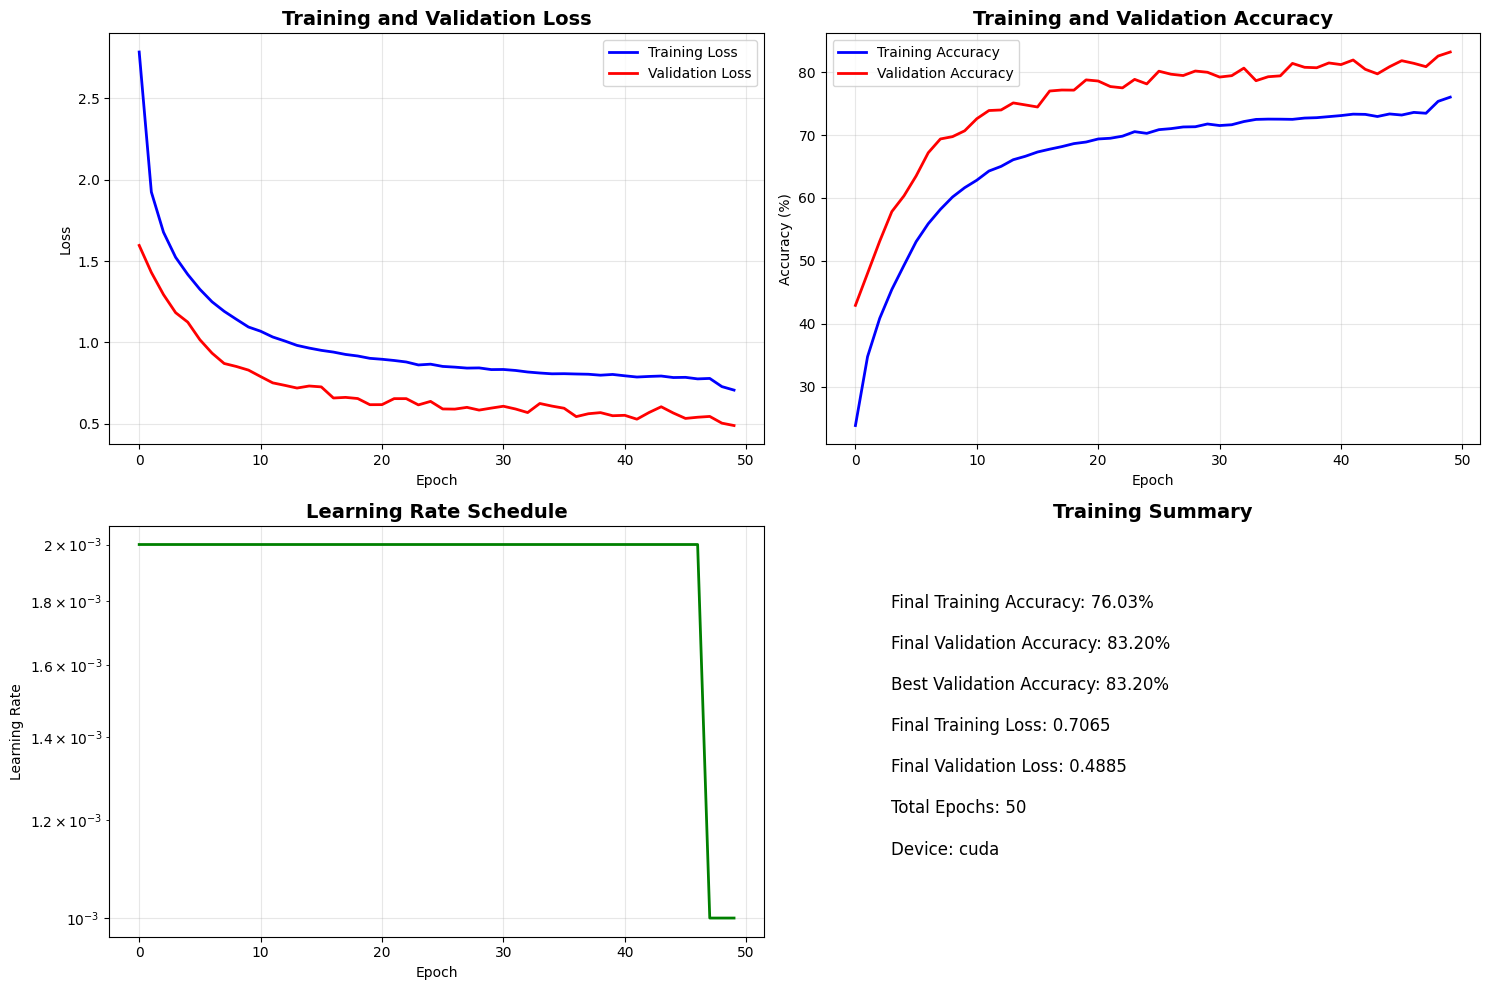


Training Summary:
  ├─ Best validation accuracy: 83.20%
  ├─ Final training accuracy: 76.03%
  ├─ Final validation accuracy: 83.20%
  └─ Total epochs completed: 50


In [18]:
# =============================================================================
# TRAINING CURVES VISUALIZATION
# =============================================================================

# Create comprehensive training visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss curves
axes[0, 0].plot(train_losses, label='Training Loss', color='blue', linewidth=2)
axes[0, 0].plot(val_losses, label='Validation Loss', color='red', linewidth=2)
axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy curves
axes[0, 1].plot(train_accuracies, label='Training Accuracy', color='blue', linewidth=2)
axes[0, 1].plot(val_accuracies, label='Validation Accuracy', color='red', linewidth=2)
axes[0, 1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Learning rate schedule
axes[1, 0].plot(learning_rates, color='green', linewidth=2)
axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Final performance summary
final_train_acc = train_accuracies[-1]
final_val_acc = val_accuracies[-1]
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]

axes[1, 1].text(0.1, 0.8, f'Final Training Accuracy: {final_train_acc:.2f}%', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.7, f'Final Validation Accuracy: {final_val_acc:.2f}%', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.6, f'Best Validation Accuracy: {best_val_acc:.2f}%', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.5, f'Final Training Loss: {final_train_loss:.4f}', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.4, f'Final Validation Loss: {final_val_loss:.4f}', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.3, f'Total Epochs: {len(train_losses)}', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.2, f'Device: {device}', 
                fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].set_title('Training Summary', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nTraining Summary:")
print(f"  ├─ Best validation accuracy: {best_val_acc:.2f}%")
print(f"  ├─ Final training accuracy: {final_train_acc:.2f}%")
print(f"  ├─ Final validation accuracy: {final_val_acc:.2f}%")
print(f"  └─ Total epochs completed: {len(train_losses)}")


Evaluating model on test set...


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 93.22it/s]


Test Accuracy: 83.20%


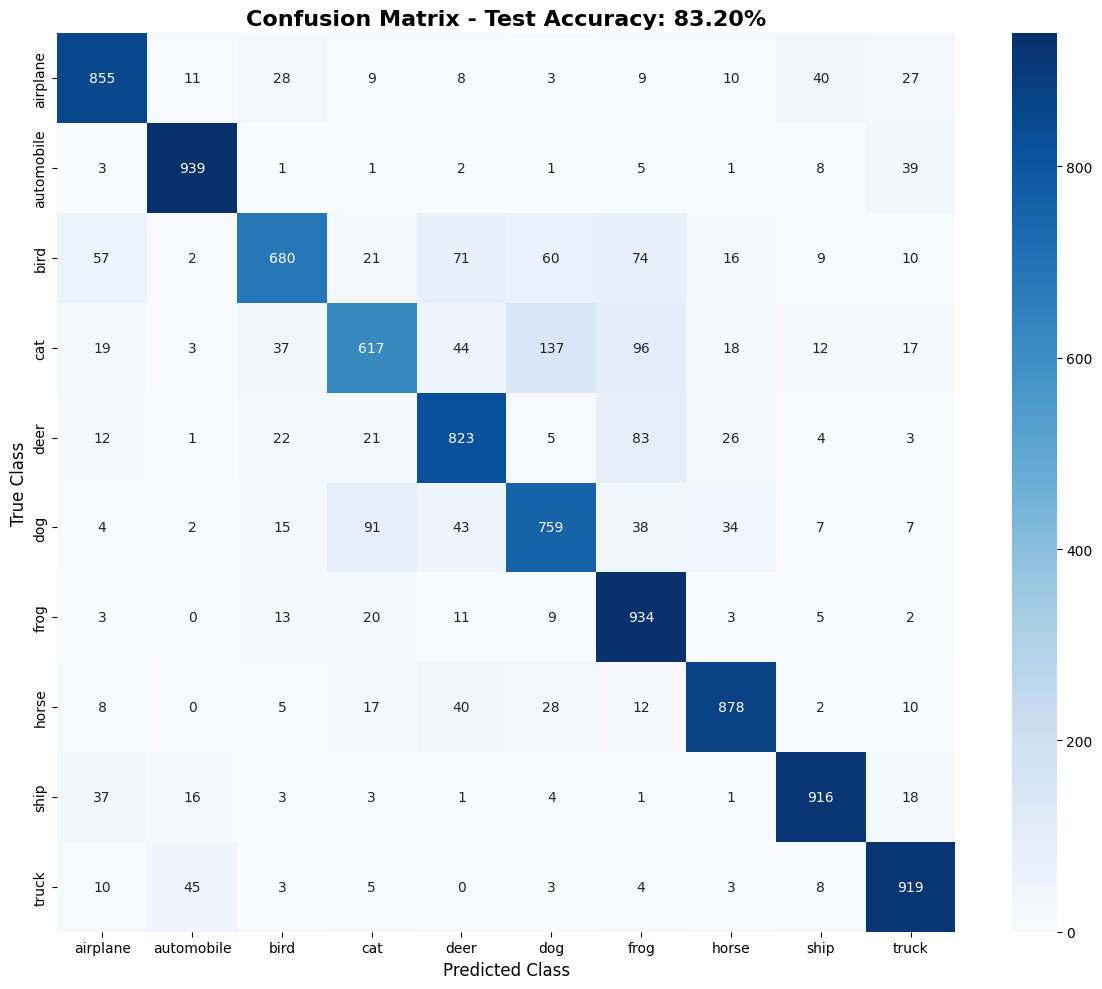


Detailed Classification Report:
              precision    recall  f1-score   support

    airplane     0.8482    0.8550    0.8516      1000
  automobile     0.9215    0.9390    0.9302      1000
        bird     0.8426    0.6800    0.7526      1000
         cat     0.7665    0.6170    0.6837      1000
        deer     0.7891    0.8230    0.8057      1000
         dog     0.7522    0.7590    0.7556      1000
        frog     0.7436    0.9340    0.8280      1000
       horse     0.8869    0.8780    0.8824      1000
        ship     0.9060    0.9160    0.9110      1000
       truck     0.8736    0.9190    0.8957      1000

    accuracy                         0.8320     10000
   macro avg     0.8330    0.8320    0.8296     10000
weighted avg     0.8330    0.8320    0.8296     10000



In [19]:
# =============================================================================
# MODEL EVALUATION AND CONFUSION MATRIX
# =============================================================================

# Get predictions on test set
model.eval()
all_predictions = []
all_targets = []

print("Evaluating model on test set...")
with torch.no_grad():
    for data, target in tqdm(test_loader, desc="Evaluating"):
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate overall accuracy
test_accuracy = 100. * (all_predictions == all_targets).sum() / len(all_targets)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(all_targets, all_predictions)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title(f'Confusion Matrix - Test Accuracy: {test_accuracy:.2f}%', 
          fontsize=16, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(all_targets, all_predictions, 
                          target_names=classes, digits=4))


Visualizing sample predictions...


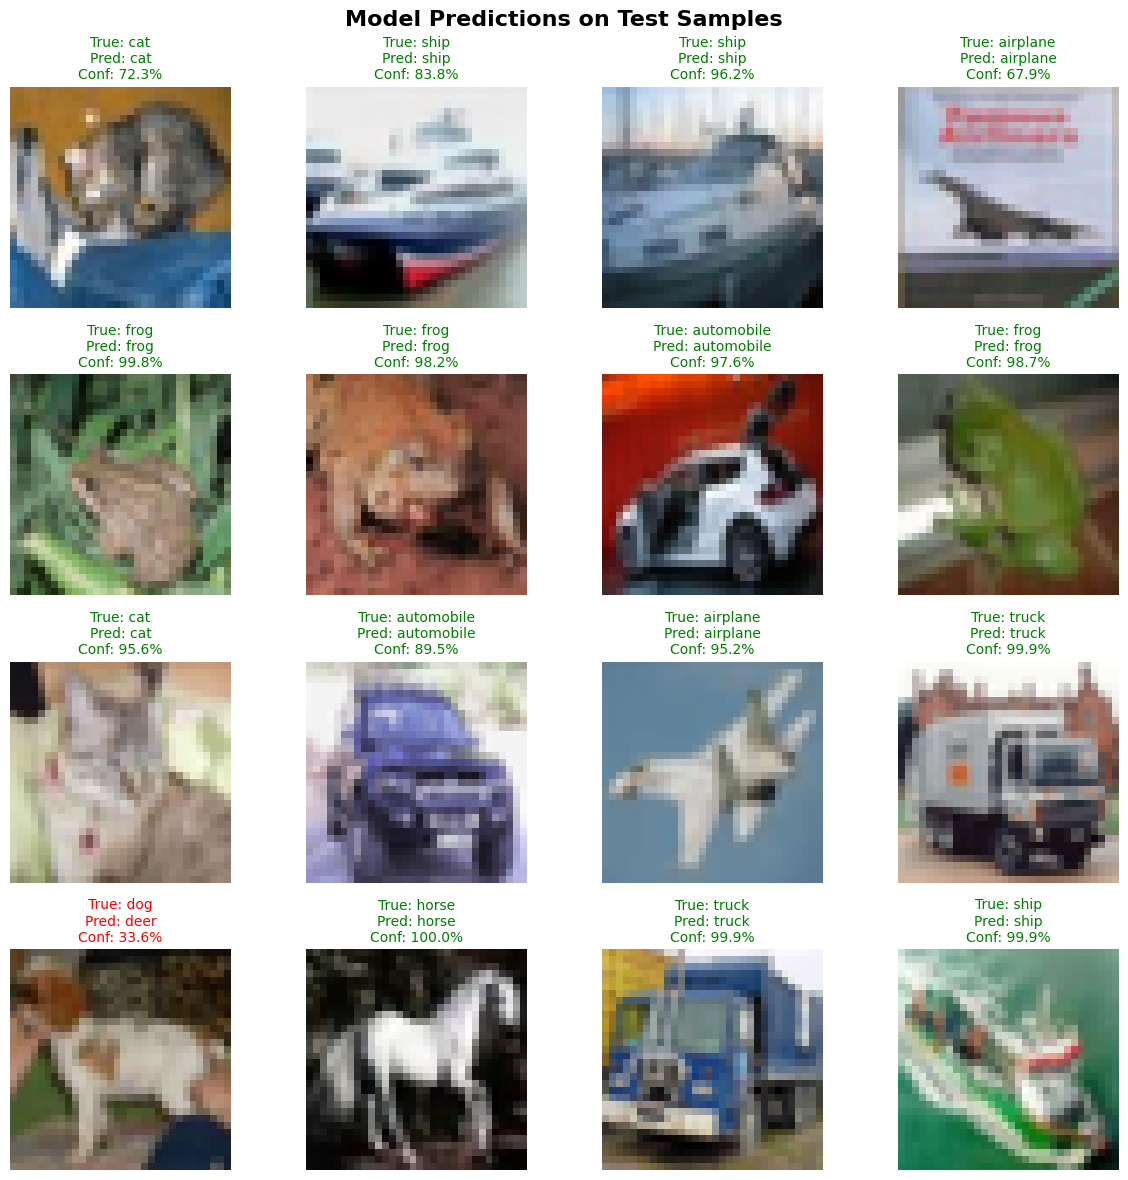

In [20]:
# =============================================================================
# SAMPLE PREDICTIONS VISUALIZATION
# =============================================================================

# Visualize some test predictions
def visualize_predictions(model, test_loader, classes, device, num_samples=16):
    """Visualize model predictions on test samples"""
    model.eval()
    
    # Get a batch of test data
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)
    
    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    
    # Move to CPU for visualization
    images = images.cpu()
    labels = labels.cpu()
    predicted = predicted.cpu()
    probabilities = probabilities.cpu()
    
    # Create visualization
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle('Model Predictions on Test Samples', fontsize=16, fontweight='bold')
    
    for i in range(min(num_samples, len(images))):
        row, col = i // 4, i % 4
        ax = axes[row, col]
        
        # Denormalize image for display
        img = images[i]
        img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        img = torch.clamp(img, 0, 1)
        img = img.permute(1, 2, 0)
        
        ax.imshow(img)
        
        # Color code: green for correct, red for incorrect
        true_label = classes[labels[i]]
        pred_label = classes[predicted[i]]
        confidence = probabilities[i][predicted[i]] * 100
        
        color = 'green' if labels[i] == predicted[i] else 'red'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%', 
                    color=color, fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample predictions
print("Visualizing sample predictions...")
visualize_predictions(model, test_loader, classes, device)


In [21]:
# =============================================================================
# FINAL EXECUTION TIME SUMMARY
# =============================================================================

# Calculate total execution time
end_time = time.time()
end_datetime = datetime.now()
total_time_seconds = end_time - start_time
total_time_delta = timedelta(seconds=total_time_seconds)

# Format the time nicely
hours = int(total_time_seconds // 3600)
minutes = int((total_time_seconds % 3600) // 60)
seconds = int(total_time_seconds % 60)

print("=" * 60)
print("CNN CIFAR-10 TRAINING COMPLETED (PyTorch)")
print("=" * 60)
print(f"Start time:    {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End time:      {end_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total time:    {hours:02d}h {minutes:02d}m {seconds:02d}s")
print(f"Total seconds: {total_time_seconds:.2f}s")
print("=" * 60)

# Final performance summary
print(f"\nFinal Performance Summary:")
print(f"  ├─ Best validation accuracy: {best_val_acc:.2f}%")
print(f"  ├─ Final test accuracy: {test_accuracy:.2f}%")
print(f"  ├─ Total parameters: {count_parameters(model)[0]:,}")
print(f"  ├─ Training epochs: {len(train_losses)}")
print(f"  ├─ Device used: {device}")
print(f"  └─ Mixed precision: {'Enabled' if use_mixed_precision else 'Disabled'}")

# Save timing results to a text file
timing_report = f"""
CNN CIFAR-10 Training Timing Report (PyTorch)
=============================================
Start Time: {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}
End Time:   {end_datetime.strftime('%Y-%m-%d %H:%M:%S')}
Duration:   {hours:02d}h {minutes:02d}m {seconds:02d}s ({total_time_seconds:.2f} seconds)

Model Configuration:
- Framework: PyTorch {torch.__version__}
- Batch Size: {batch_size}
- Epochs: {len(train_losses)}
- Learning Rate: {learning_rate}
- Weight Decay: {weight_decay}
- Mixed Precision: {'Enabled' if use_mixed_precision else 'Disabled'}

Final Performance:
- Best Validation Accuracy: {best_val_acc:.2f}%
- Final Test Accuracy: {test_accuracy:.2f}%
- Total Parameters: {count_parameters(model)[0]:,}
"""

with open('pytorch_training_report.txt', 'w') as f:
    f.write(timing_report)

print("\nTraining report saved to 'pytorch_training_report.txt'")
print("All tasks completed successfully!")


CNN CIFAR-10 TRAINING COMPLETED (PyTorch)
Start time:    2025-09-23 23:53:47
End time:      2025-09-24 00:15:23
Total time:    00h 21m 36s
Total seconds: 1296.10s

Final Performance Summary:
  ├─ Best validation accuracy: 83.20%
  ├─ Final test accuracy: 83.20%
  ├─ Total parameters: 551,722
  ├─ Training epochs: 50
  ├─ Device used: cuda
  └─ Mixed precision: Enabled

Training report saved to 'pytorch_training_report.txt'
All tasks completed successfully!
